In [35]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import networkx as nx
plt.style.use('ggplot') 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [241]:
df_raw = pd.read_csv('./London_Multiplex_Transport/Dataset/london_transport_raw.edges',sep=' ',header=None)
df_raw.columns = ['line','station_1','station_2']
print(df_raw.shape)
df_raw.head()

(503, 3)


,line,station_1,station_2
0,bakerloo,harrow&wealdstone,kenton
1,bakerloo,kenton,southkenton
2,bakerloo,southkenton,northwembley
3,bakerloo,northwembley,wembleycentral
4,bakerloo,wembleycentral,stonebridgepark


In [280]:
df_nodes = pd.read_csv('./London_Multiplex_Transport/Dataset/london_transport_nodes.txt',sep=' ')
print(df_nodes.shape)
df_nodes.head()

(369, 4)


,nodeID,nodeLabel,nodeLat,nodeLong
0,0,abbeyroad,51.531952,0.003738
1,1,westham,51.528526,0.005332
2,2,actoncentral,51.508758,-0.263416
3,3,willesdenjunction,51.532234,-0.243895
4,4,actontown,51.503071,-0.280288


In [243]:
df_multiplex = pd.read_csv('./London_Multiplex_Transport/Dataset/london_transport_multiplex.edges',sep=' ',header=None)
df_multiplex.columns = ['layer','node_1','node_2','weight']
print(df_multiplex.shape)
df_multiplex.head()

(441, 4)


,layer,node_1,node_2,weight
0,1,1,77,2
1,1,1,106,1
2,1,1,219,1
3,1,1,321,2
4,1,3,224,1


In [182]:
df_disruption_sum = pd.read_csv('./London_Multiplex_Transport/Dataset/london_transport_disruptions_summary.txt',sep=' ')
print(df_disruption_sum.shape)
df_disruption_sum.head()

(325, 6)


,#DISRUP_ID,LAYER,STATION_A,STATION_B,FREQUENCY%,DAMAGED_NODES%
0,DISR1,metropolitan,aldgate,bakerstreet,3.3457,2.439
1,DISR2,hammersmith&city,barking,moorgate,2.8914,3.523
2,DISR3,dlr,beckton,canningtown,2.5609,2.439
3,DISR4,overground,claphamjunction,surreyquays,2.0240,1.897
4,DISR5,overground,richmond,willesdenjunction,1.9413,1.626


In [183]:
df_layers = pd.read_csv('./London_Multiplex_Transport/Dataset/london_transport_layers.txt',sep='\t')
df_layers['layerID'] = [int(x[0]) for x in list(df_layers.iloc[:,0])]
df_layers['layerLabel'] = [x[2:] for x in list(df_layers.iloc[:,0])]
df_layers.drop(df_layers.columns[0],axis=1,inplace=True)
df_layers

,layerID,layerLabel
0,1,Tube (All underground lines aggregated)
1,2,Overground
2,3,DLR


In [336]:
line={}
for i in range(len(df_raw)):
    tup=(str(df_raw.station_1[i]),str(df_raw.station_2[i]))
    line[tup]=df_raw.line[i]

In [337]:
coords={}
for i in range(len(df_nodes)):
    coords[df_nodes.nodeLabel[i]]=(float(df_nodes.nodeLong[i]) ,float(df_nodes.nodeLat[i]))
    

In [338]:
data_1 = df_multiplex[df_multiplex.layer == 1].loc[:, 'node_1':].values
data_2 = df_multiplex[df_multiplex.layer == 2].loc[:, 'node_1':].values
data_3 = df_multiplex[df_multiplex.layer == 3].loc[:, 'node_1':].values

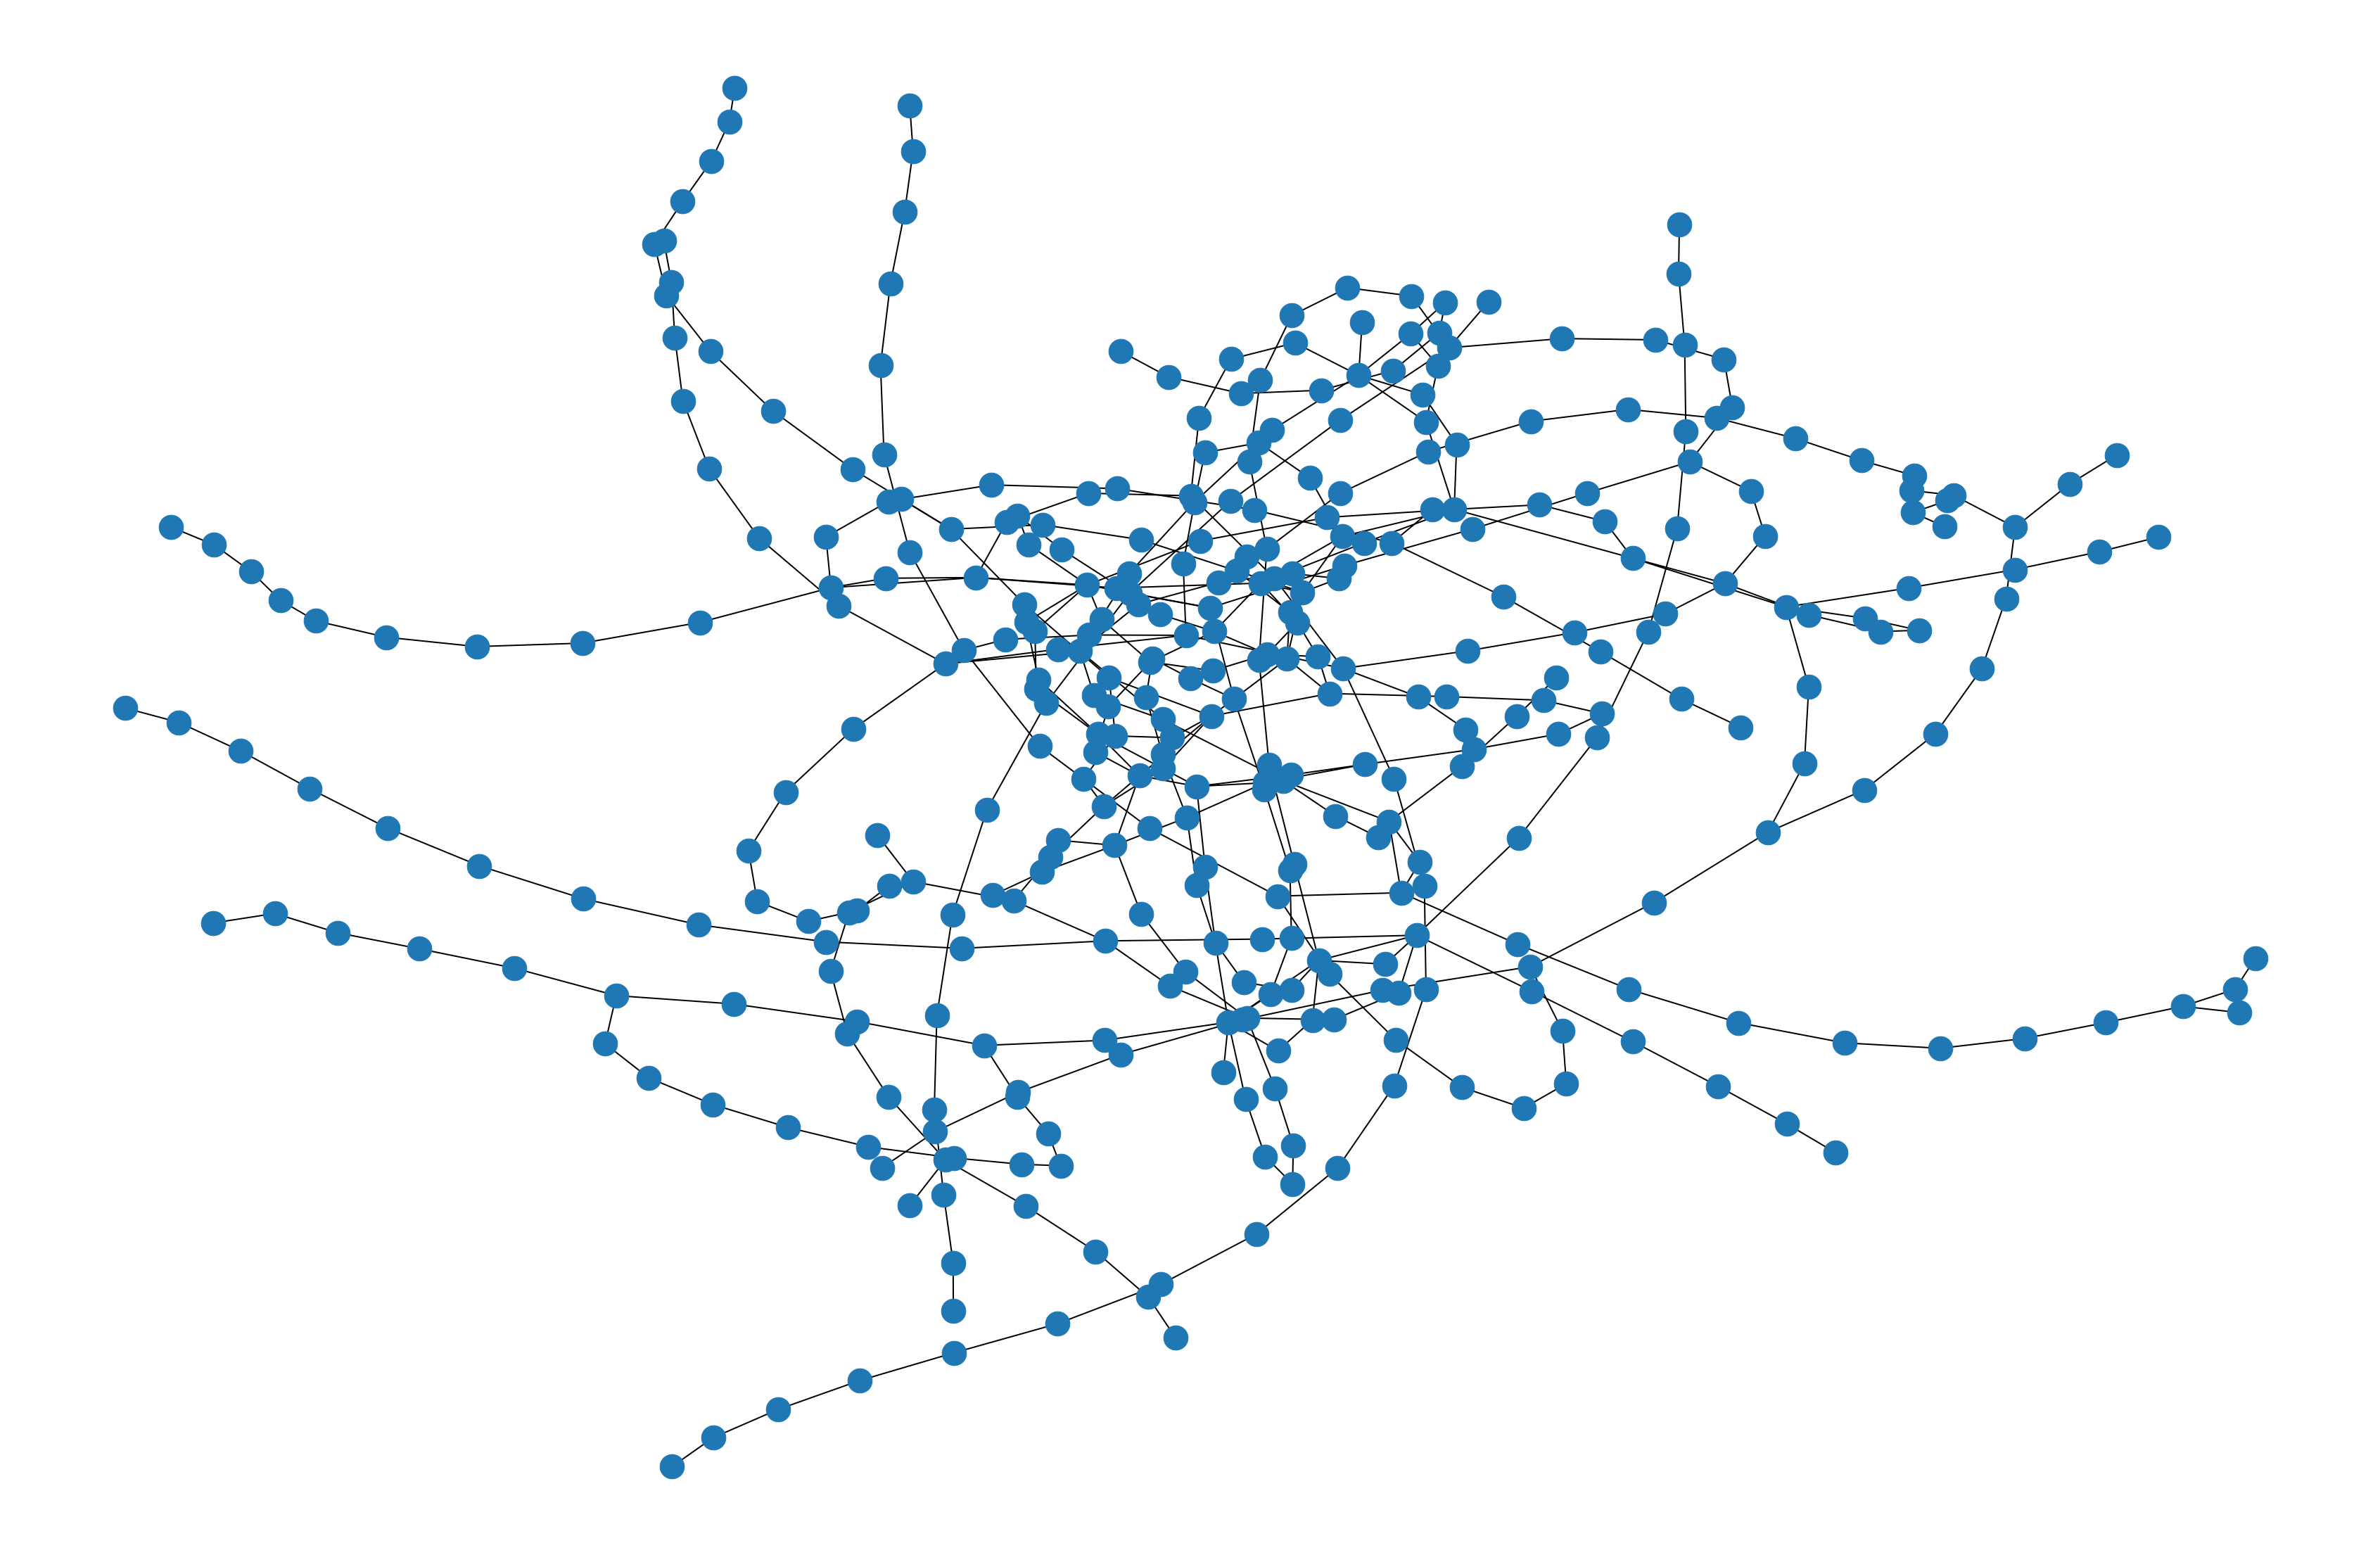

In [339]:
G = nx.Graph()

# define the nodes

for i in range(len(df_nodes)):
    G.add_node(df_nodes.nodeLabel[i])
    

# link the nodes
for i in range(len(df_raw)):
    stat1=df_raw.station_1[i]
    stat2=df_raw.station_2[i]
    G.add_edge(stat1,stat2)






fig=plt.subplots(figsize=(30,20))
nx.draw(G)
plt.show()

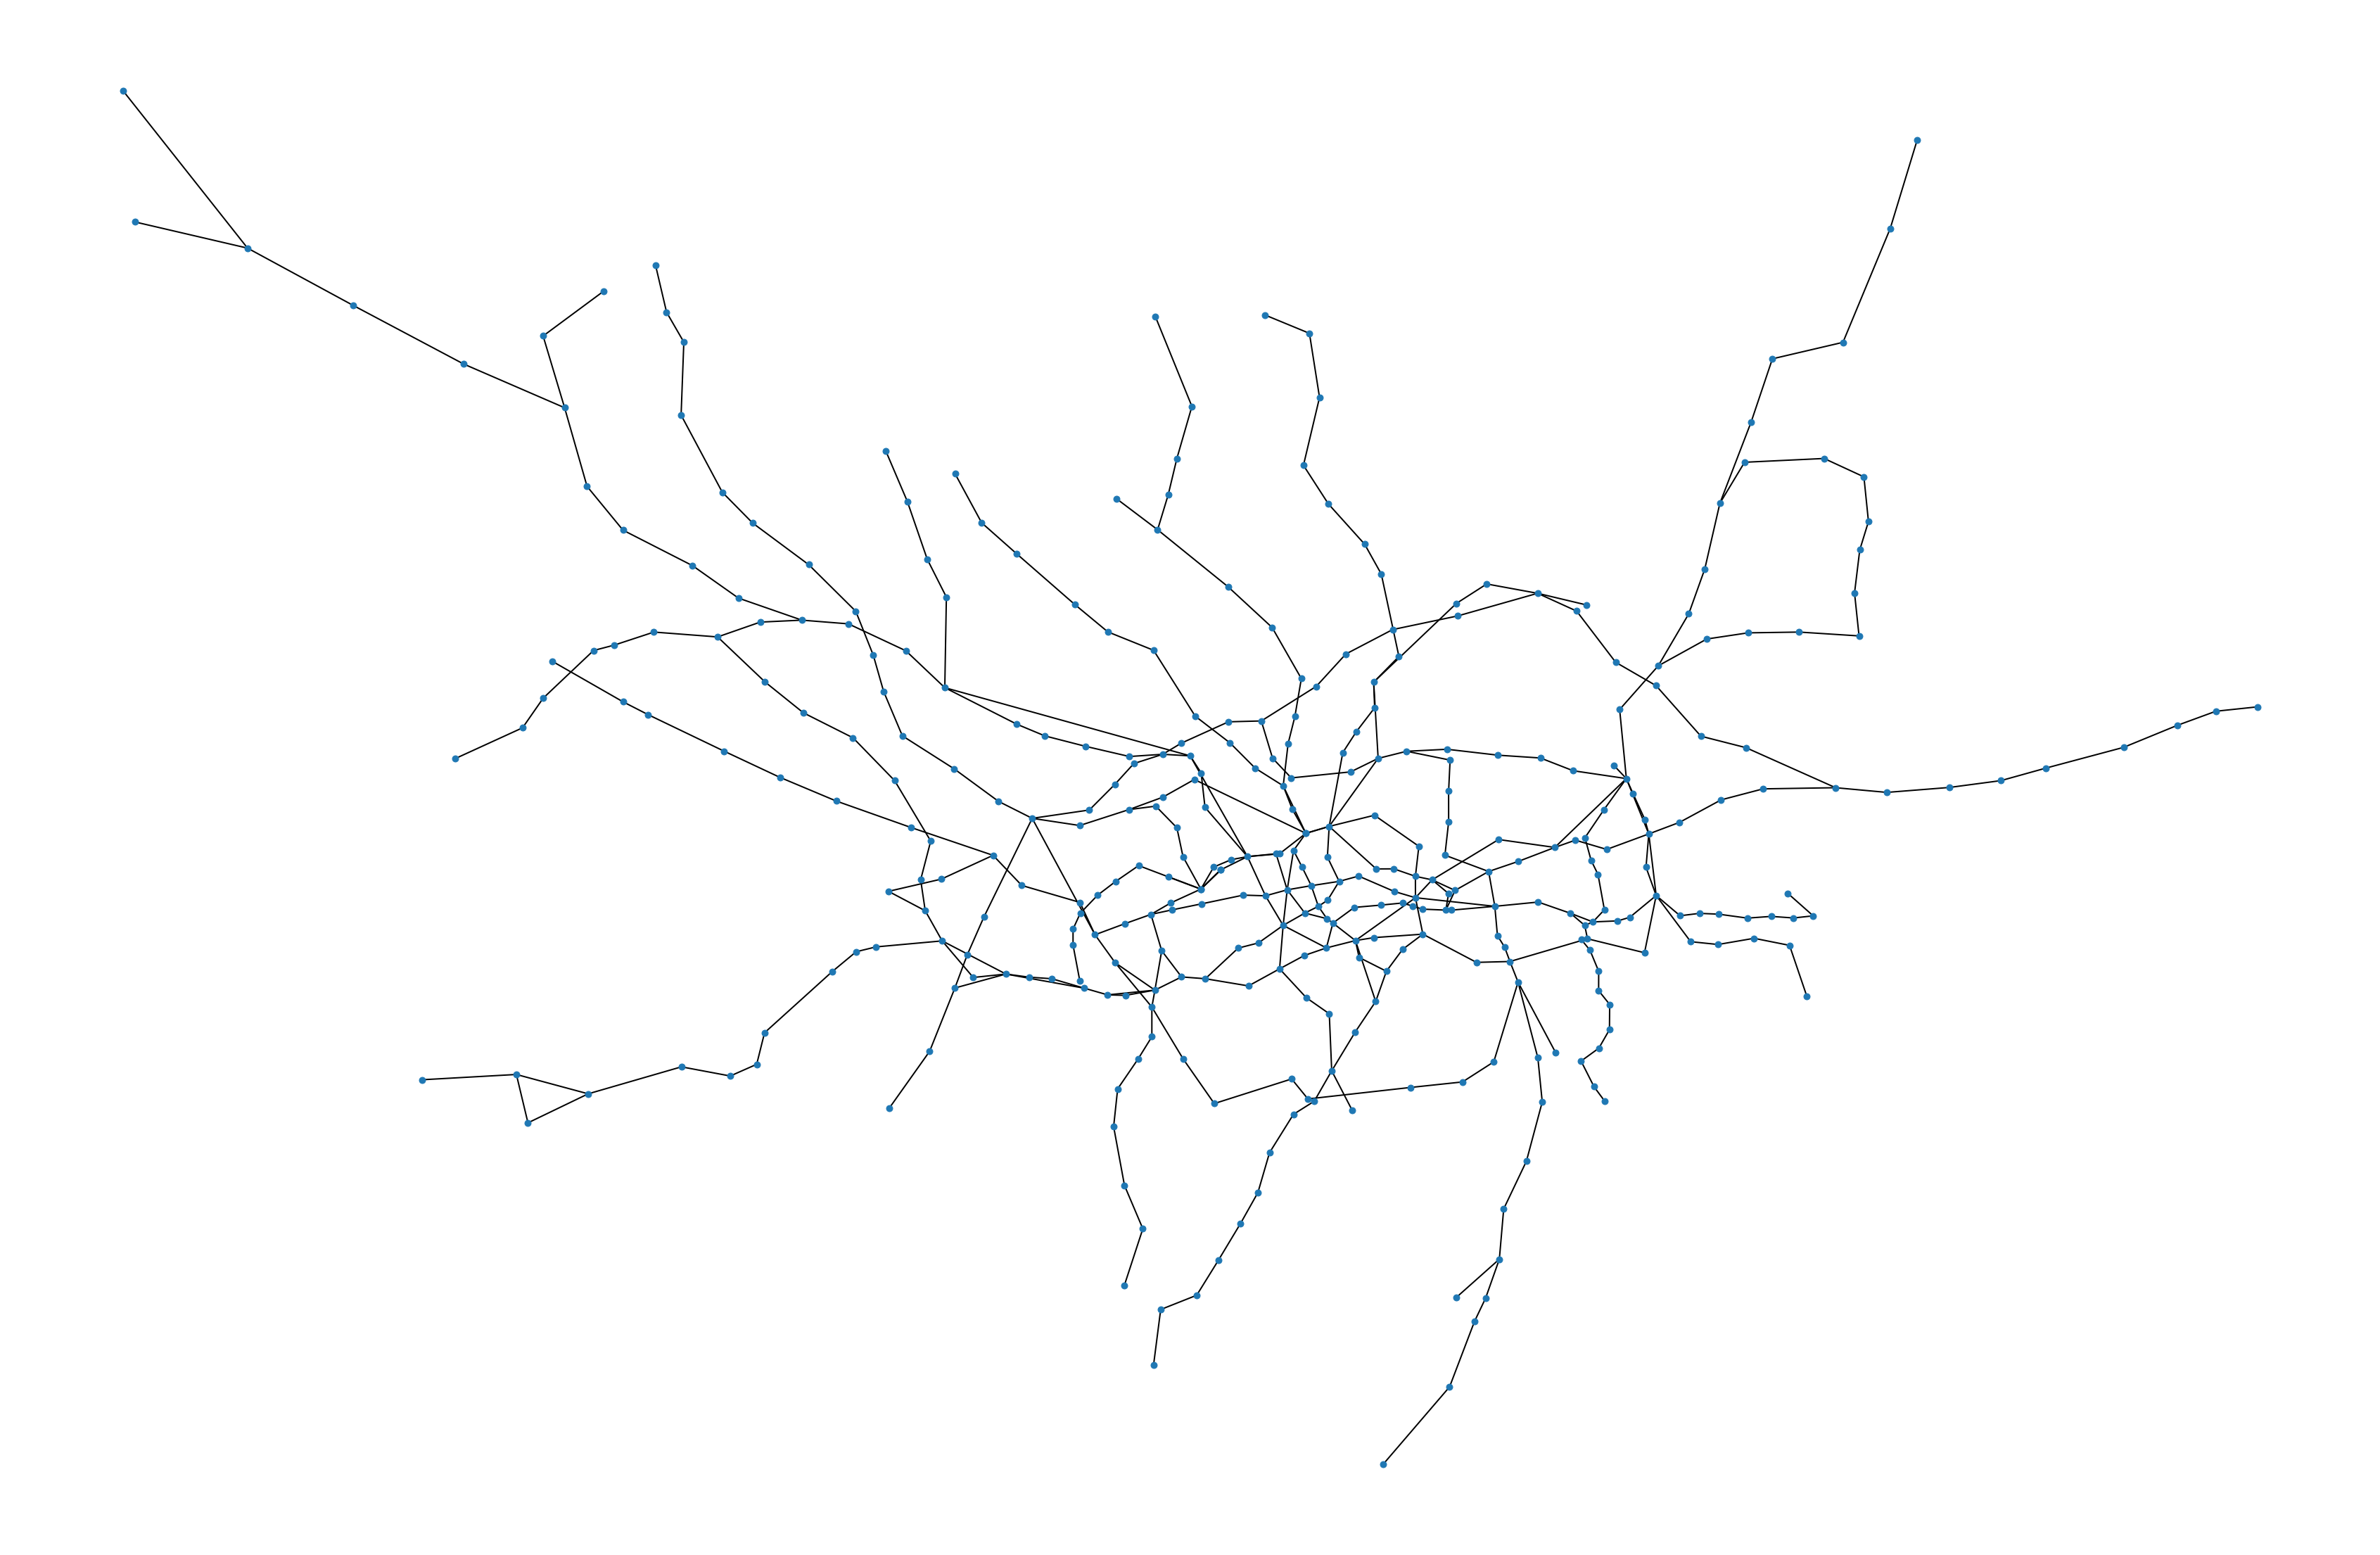

In [340]:
fig=plt.subplots(figsize=(30,20))
nx.draw(G, with_labels=False,pos=coords,node_size=20)
plt.show()

In [6]:
col_list={}
for i in df_raw.line.unique():
    print(i)
    cl=input('Color: ')
    col_list[i]=cl

bakerloo
Color: brown
central
Color: red
circle
Color: yellow
district
Color: green
hammersmith&city
Color: pink
jubilee
Color: silver
metropolitan
Color: purple
northern
Color: black
piccadilly
Color: navy
victoria
Color: skyblue
waterloo&city
Color: teal
overground
Color: orange
dlr
Color: cyan


In [342]:
colors=[]
for i in G.edges:
    try:
        l=line[i]
        colors.append(col_list[l])
    except:
        tup=(i[1],i[0])
        l=line[tup]
        colors.append(col_list[l])

In [343]:
col_dict={}
for i in G.edges:
    n=0
    while n<430:
        col_dict[i]=colors[n]
        n+=1
    

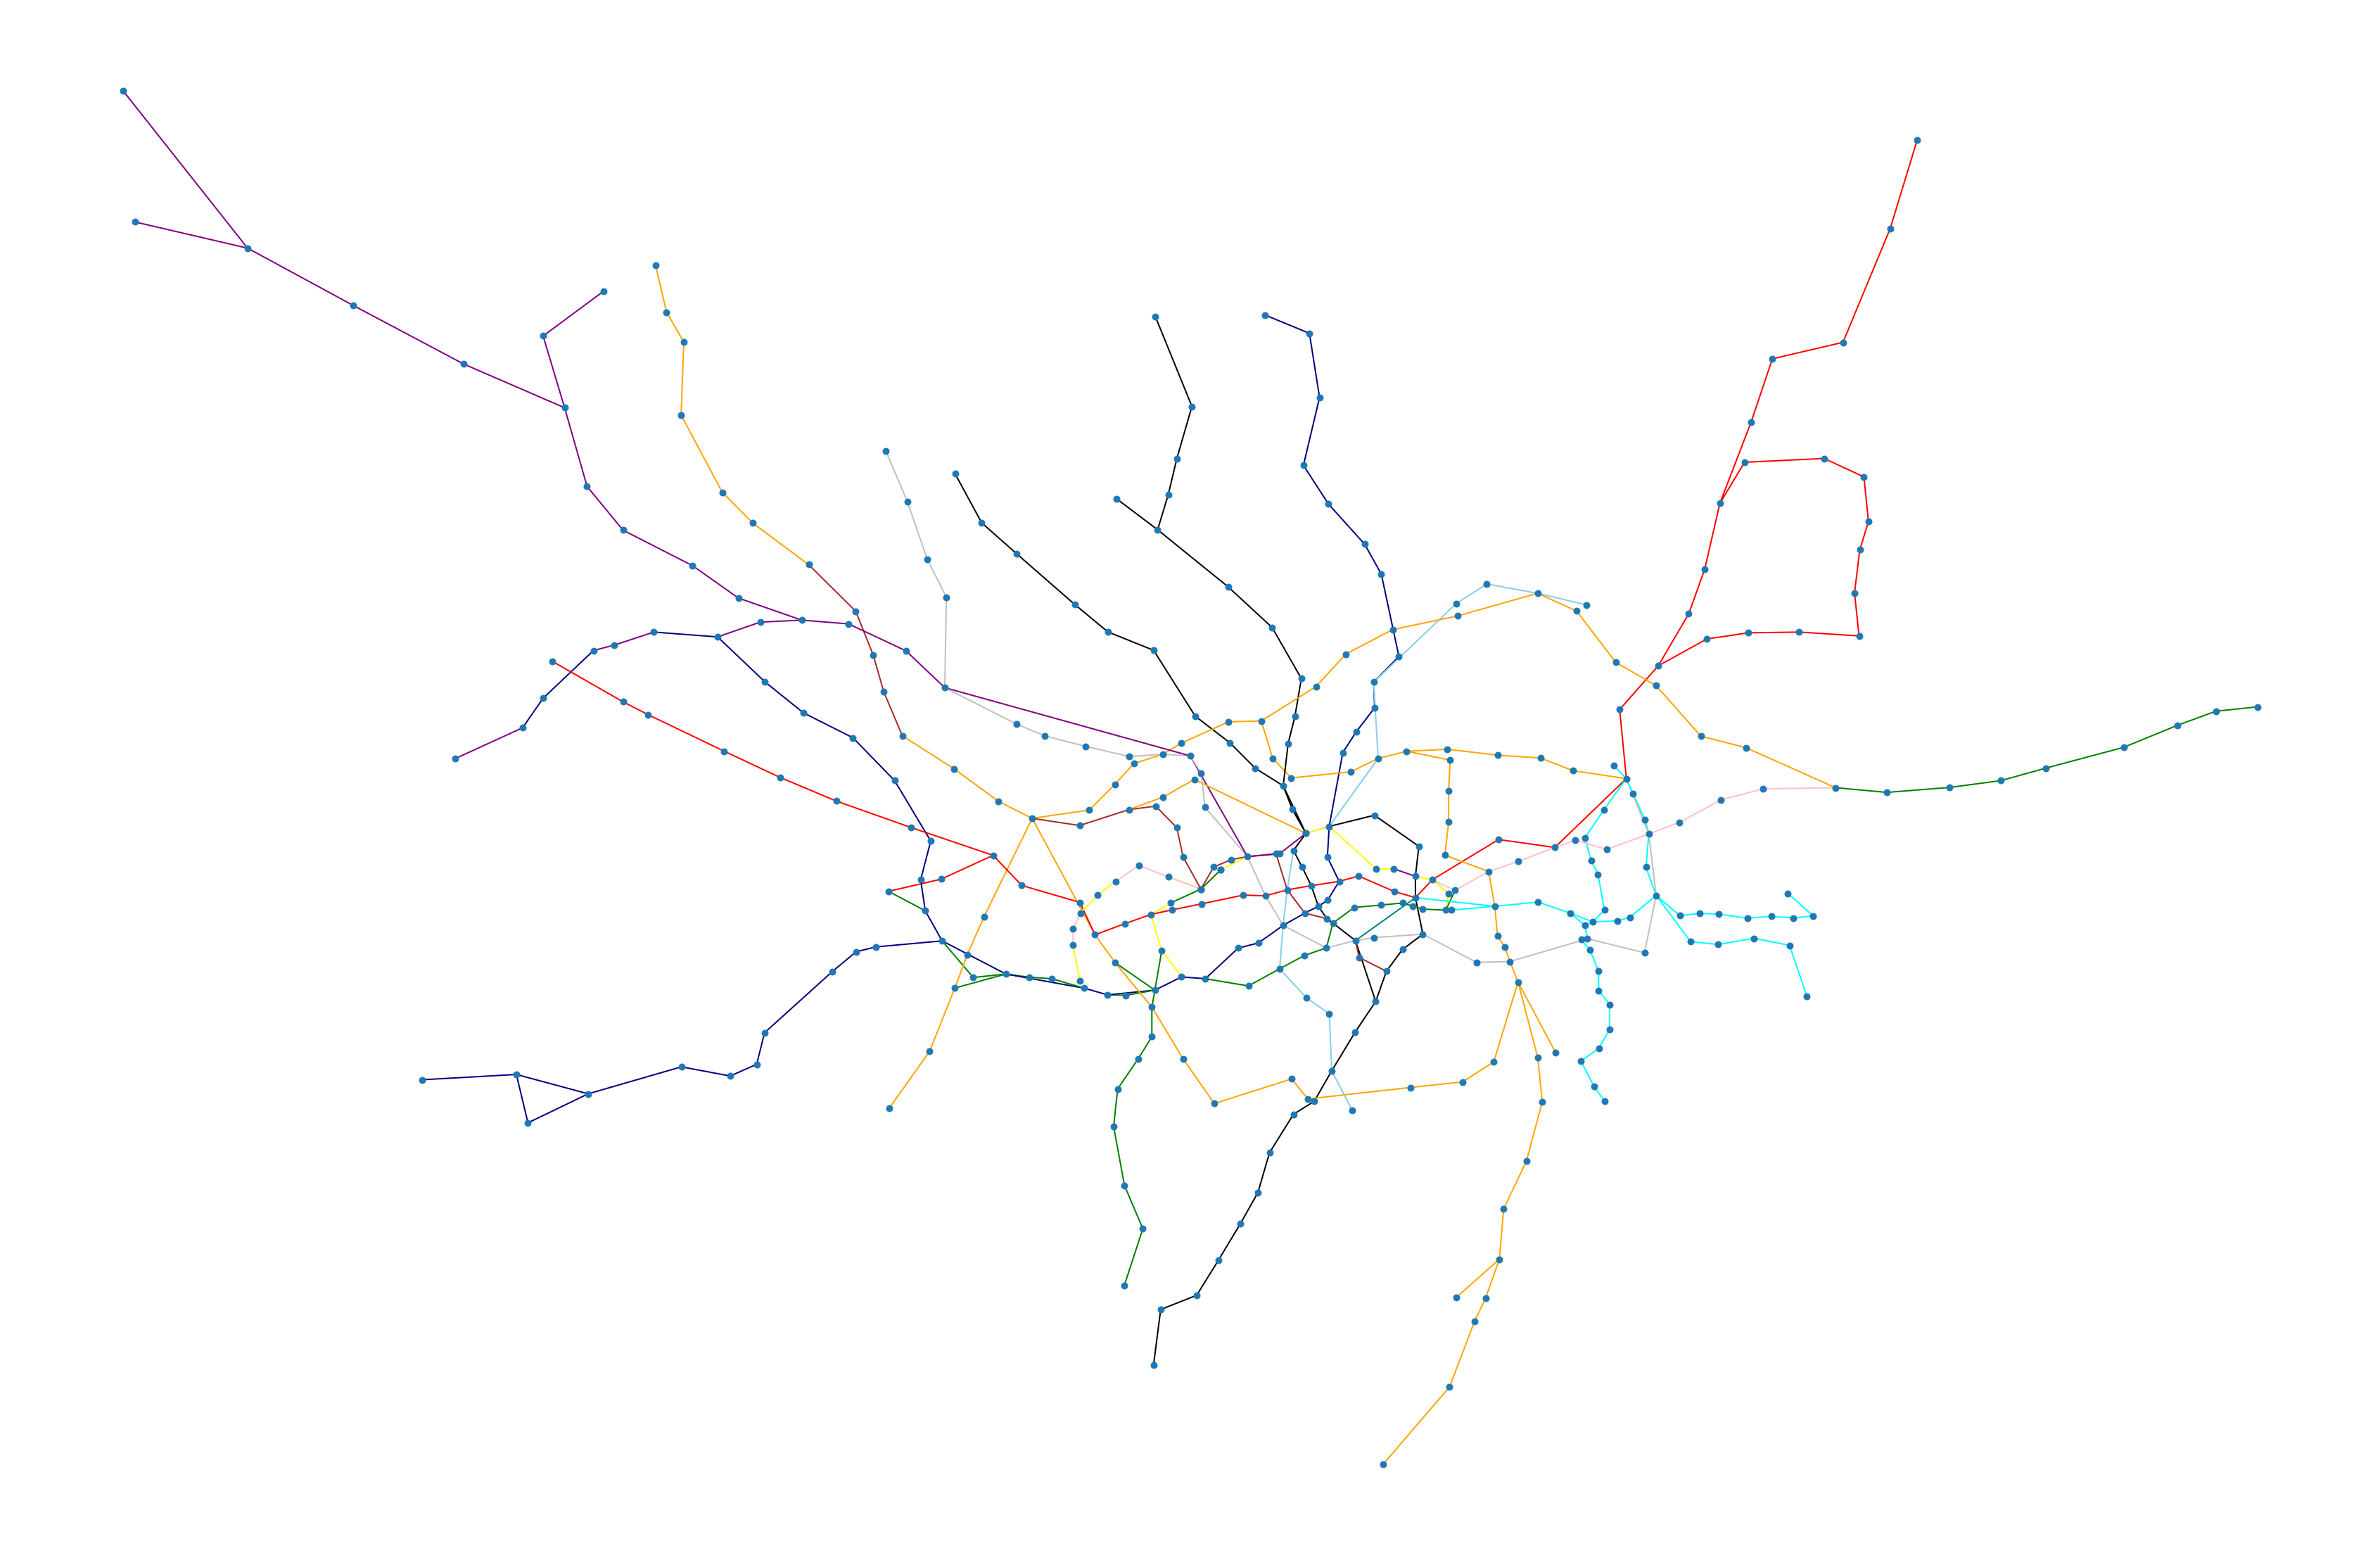

In [344]:
# generate an empty graph
G = nx.Graph()

# define the nodes

for i in range(len(df_nodes)):
    G.add_node(df_nodes.nodeLabel[i])
    

# link the nodes
for i in range(len(df_raw)):
    stat1=df_raw.station_1[i]
    stat2=df_raw.station_2[i]
    G.add_edge(stat1,stat2)






fig=plt.subplots(figsize=(30,20))
nx.draw(G, with_labels=False,pos=coords,edge_color=colors,node_size=20)
plt.show()

In [304]:
def find_path(G,start_station, end_station, df_nodes=df_nodes, df_raw=df_raw, df_raw2=df_raw2):
    start_station=start_station.lower().replace(' ','')
    end_station=end_station.lower().replace(' ','')
    try:
        start_node = int(df_nodes.nodeID[df_nodes.nodeLabel == start_station])
    except:
        return('Your start point does not exist.')
    try:
        end_node = int(df_nodes.nodeID[df_nodes.nodeLabel == end_station])
    except:
        return('Your end point does not exist.')
    pathlength = nx.shortest_path_length(G, start_station, end_station)
    path = nx.shortest_path(G, start_station, end_station)
    print('Shortest path length is ' + str(pathlength))
    print('This path will take you through: ')
    for station in path:
        print(stat_list[station])
    print("You will have to take the following lines:")
    lines=[]
    for i in range(len(path)):
        try:
            df=df_raw.line[((df_raw.station_1 == path[i]) & (df_raw.station_2 == path[i+1] ))]
            df.reset_index(drop=True,inplace=True)
            if df[0] not in lines:
                lines.append(df[0])
        except:
            try:
                df=df_raw.line[((df_raw.station_1 == path[i+1]) & (df_raw.station_2 == path[i] ))]
                df.reset_index(drop=True,inplace=True)
                if df[0] not in lines:
                    lines.append(df[0])
            except:
                pass
    for line in lines:
        print(line_list[line])
    G_new = nx.Graph()
    for n in path:
        G_new.add_node(stat_list[n])
    colors=[]
    for e in range(len(path)):
        try:
            G_new.add_edge(stat_list[path[e]],stat_list[path[e+1]])
            try:
                line=df_raw2.line[((df_raw2.station_1 == stat_list[path[e]]) & (df_raw2.station_2 == stat_list[path[e+1]] ))].reset_index(drop=True)[0]
                colors.append(col_list[line])
            except:
                line=df_raw2.line[((df_raw2.station_1 == stat_list[path[e+1]]) & (df_raw2.station_2 == stat_list[path[e]] ))].reset_index(drop=True)[0]
                colors.append(col_list[line])
                
        except:
            pass
    
    

    
    fig=plt.subplots(figsize=(30,20))
    nx.draw(G_new, with_labels=True,pos=coords2,edge_color=colors,node_size=50)
    plt.show()
    
        
    
    
    
    

In [7]:
with open('col.pkl', 'wb') as col:
    pickle.dump(col_list, col)

Shortest path length is 15
This path will take you through: 
Liverpool Street
Bank
Waterloo
Westminster
St James Park
Victoria
Sloane Square
South Kensington
Gloucester Road
Earls Court
Kensington (Olympia)
Shepherds Bush
White City
East Acton
North Acton
West Acton
You will have to take the following lines:
Central
Waterloo & City
Jubilee
Circle
District
Overground


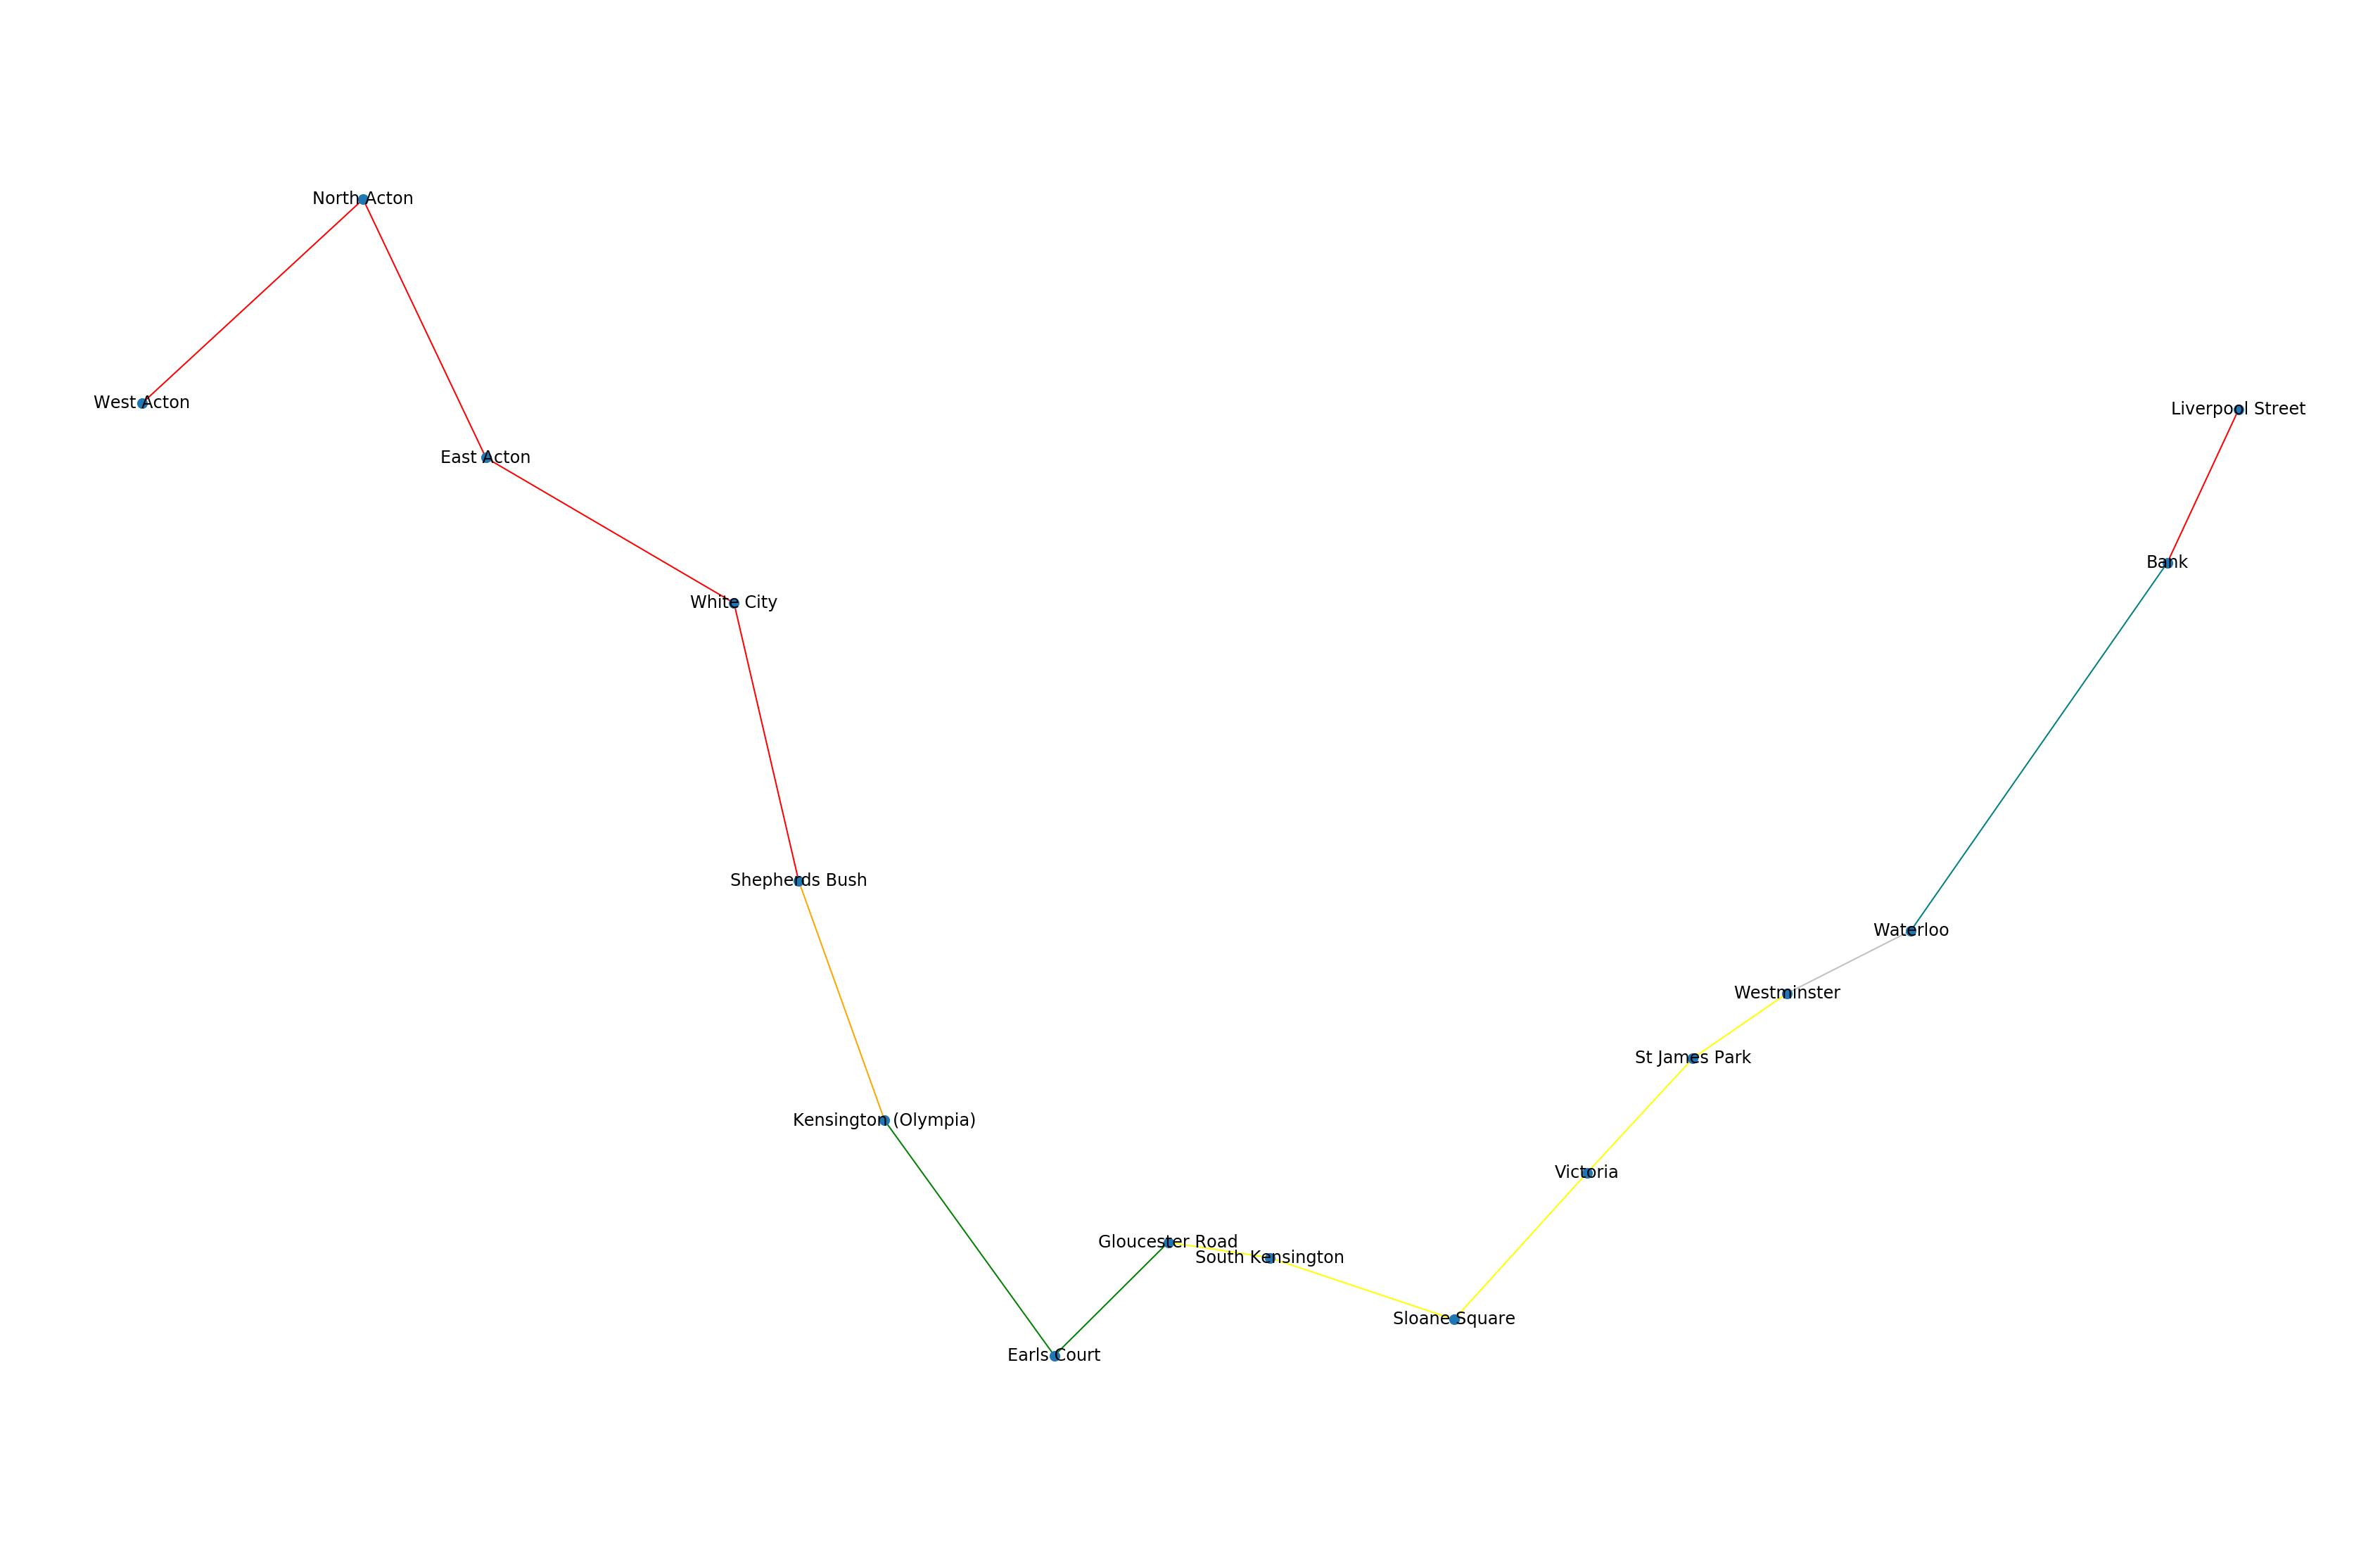

In [323]:
find_path(G, 'liverpool street','westacton')

In [2]:
import pandas as pd
import numpy as np
import dash
import pickle
import flask
import math
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import networkx as nx

In [3]:
info=pd.read_csv('stat_cap.csv')

with open('coords.pkl', 'rb') as coords:
    coordinates = pickle.load(coords)
with open('line_list.pkl', 'rb') as line_list:
    line_list = pickle.load(line_list)
with open('stat_list.pkl', 'rb') as stat_list:
    stat_list = pickle.load(stat_list)
with open('G.pkl', 'rb') as G:
    G = pickle.load(G)
with open('col.pkl', 'rb') as col:
    col_list = pickle.load(col)
df_raw = pd.read_csv('./London_Multiplex_Transport/Dataset/london_transport_raw.edges',sep=' ',header=None)
df_raw.columns = ['line','station_1','station_2']
df_nodes = pd.read_csv('./London_Multiplex_Transport/Dataset/london_transport_nodes.txt',sep=' ')

In [4]:
cols={
    'background': '#F0F0F0',
    'text': '#7FDBFF',
    'figure':'#D3D3D3',
    'header':'#33F9FF'
    
}

In [8]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__)
app.scripts.config.serve_locally = True


app.layout=html.Div(children=[
    html.Div(children=[
        html.H1('Underground Shortest Path Finder',style={'textAlign': 'center'}),
        html.H2('Enter in any two stations to find the shortest path between them',style={'textAlign': 'center'}),
        html.H3('Note: Shortest path in terms of stations, not distance or time',style={'textAlign': 'center'})
    ]),
    html.Div(children=[
        html.H3('Start Station',style={'textAlign': 'center'}),
        dcc.Input(id='start',style={'display': 'inline-block'})
    ],style={'textAlign': 'center'}),
    html.Div(children=[
        html.H3('End Station',style={'textAlign': 'center'}),
        dcc.Input(id='end',style={'display': 'inline-block'})
    ],style={'textAlign': 'center'}),
    html.Div(id='out',children=[
        html.Div(id='length',style={'textAlign': 'center'}),
        html.Div(id='path',style={'textAlign': 'center'}),
        html.Div(id='lines',style={'textAlign': 'center'}),
        dcc.Graph(id='network',style={'backgroundColor': cols['background']})
    ],style={'display':'none'})
    
    
    
],style={'backgroundColor': cols['background']})
@app.callback([Output('out','style'),
               Output('length','children'),
               Output('path','children'),
               Output('lines','children'),
               Output('network','figure')],
             [Input('start','value'),
              Input('end','value')])
def output(start,end):
    start_station=start.lower().replace(' ','')
    end_station=end.lower().replace(' ','')
    try:
        start_node = int(df_nodes.nodeID[df_nodes.nodeLabel == start_station])
    except:
        return[('Your start station does not exist.')], [],[]
    try:
        end_node = int(df_nodes.nodeID[df_nodes.nodeLabel == end_station])
    except:
        return[('Your end station does not exist.')], [],[]
    pathlength = nx.shortest_path_length(G, start_station, end_station)
    path = nx.shortest_path(G, start_station, end_station)
    lines=[]
    for i in range(len(path)):
        try:
            df=df_raw.line[((df_raw.station_1 == path[i]) & (df_raw.station_2 == path[i+1] ))]
            df.reset_index(drop=True,inplace=True)
            if df[0] not in lines:
                lines.append(df[0])
        except:
            try:
                df=df_raw.line[((df_raw.station_1 == path[i+1]) & (df_raw.station_2 == path[i] ))]
                df.reset_index(drop=True,inplace=True)
                if df[0] not in lines:
                    lines.append(df[0])
            except:
                pass
    G_n=nx.Graph()
    for n in path:
        G_n.add_node(stat_list[n])
    colors=[]
    for e in range(len(path)):
        try:
            G_n.add_edge(stat_list[path[e]],stat_list[path[e+1]])
            try:
                line=info.line[((info.station_1 == stat_list[path[e]]) & (info.station_2 == stat_list[path[e+1]] ))].reset_index(drop=True)[0]
                colors.append(col_list[line])
            except:
                line=info.line[((info.station_1 == stat_list[path[e+1]]) & (info.station_2 == stat_list[path[e]] ))].reset_index(drop=True)[0]
                colors.append(col_list[line])

        except:
            pass
    
    edge_x = []
    edge_y = []
    for edge in G_n.edges():
        x0, y0 = coordinates[edge[0]]
        x1, y1 = coordinates[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        hoverinfo='none',
        mode='lines')
    node_trace = go.Scatter(
        x=[],
        y=[],
        text=[],
        mode='markers + text',
        hoverinfo='none',
        textposition='top center')
    
    for node in G_n.nodes():
        x, y = coordinates[node]
        node_trace['x'] += tuple([x])
        node_trace['y'] += tuple([y])
    node_text = []
    for node,adj in G_n.adjacency():
        node_text.append(node)

    node_trace.marker.color=colors
    edge_trace.marker.color=colors
    node_trace.text = node_text
    fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
               
                titlefont_size=16,
                paper_bgcolor=cols['background'],
                showlegend=False,
                height=500,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
            
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
    chil1=[html.H2('Shortest path is ' + str(pathlength) + ' stations')]
    chil2=[html.H2('These stations are: '),
           html.H2([stat_list[stats] +', ' for stats in path])]
    chil3=[html.H2('You will have to take the following lines:'),
           html.H2([line_list[line] +', ' for line in lines])]
    
    
    
    
    return {'display':True},chil1, chil2, chil3,fig

    
application=app.server
if __name__ == '__main__':
    application.run(debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [25/Mar/2020 22:37:54] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/Mar/2020 22:37:55] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [25/Mar/2020 22:37:55] "GET /_dash-dependencies HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**re

127.0.0.1 - - [25/Mar/2020 22:37:55] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**re

127.0.0.1 - - [25/Mar/2020 22:37:56] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**re

127.0.0.1 - - [25/Mar/2020 22:37:56] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**re

127.0.0.1 - - [25/Mar/2020 22:37:56] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**re

127.0.0.1 - - [25/Mar/2020 22:37:57] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**re

127.0.0.1 - - [25/Mar/2020 22:37:58] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**re

127.0.0.1 - - [25/Mar/2020 22:37:59] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**re

127.0.0.1 - - [25/Mar/2020 22:37:59] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**re

127.0.0.1 - - [25/Mar/2020 22:37:59] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**re

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**re

127.0.0.1 - - [25/Mar/2020 22:38:00] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**re

127.0.0.1 - - [25/Mar/2020 22:38:00] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [25/Mar/2020 22:38:00] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**re

127.0.0.1 - - [25/Mar/2020 22:38:04] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**re

127.0.0.1 - - [25/Mar/2020 22:38:05] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**re

127.0.0.1 - - [25/Mar/2020 22:38:05] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**re

127.0.0.1 - - [25/Mar/2020 22:38:06] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**re

127.0.0.1 - - [25/Mar/2020 22:38:06] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**re

127.0.0.1 - - [25/Mar/2020 22:38:06] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**re

127.0.0.1 - - [25/Mar/2020 22:38:06] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**re

127.0.0.1 - - [25/Mar/2020 22:38:07] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**re

127.0.0.1 - - [25/Mar/2020 22:38:07] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [25/Mar/2020 22:38:07] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**re

127.0.0.1 - - [25/Mar/2020 22:38:09] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**re

127.0.0.1 - - [25/Mar/2020 22:38:09] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**re

127.0.0.1 - - [25/Mar/2020 22:38:09] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**re

127.0.0.1 - - [25/Mar/2020 22:38:09] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**re

127.0.0.1 - - [25/Mar/2020 22:38:10] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**re

127.0.0.1 - - [25/Mar/2020 22:38:10] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**re

127.0.0.1 - - [25/Mar/2020 22:38:10] "POST /_dash-update-component HTTP/1.1" 500 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 2446, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1951, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1820, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1949, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/alastairtyson/opt/anaconda3/lib/python3.7/site-packages/flask/app.py", line 1935, in dispatch_request
    return self.view_functions[rule.endpoint](**re

127.0.0.1 - - [25/Mar/2020 22:38:10] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [25/Mar/2020 22:38:11] "POST /_dash-update-component HTTP/1.1" 200 -
